<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#5.1-基于Logistic-回归和Sigmoid-函数的分类" data-toc-modified-id="5.1-基于Logistic-回归和Sigmoid-函数的分类-1">5.1 基于Logistic 回归和Sigmoid 函数的分类</a></span></li><li><span><a href="#5.2-基于最优化方法的最佳回归系数确定" data-toc-modified-id="5.2-基于最优化方法的最佳回归系数确定-2">5.2 基于最优化方法的最佳回归系数确定</a></span><ul class="toc-item"><li><span><a href="#5.2.1-梯度上升法" data-toc-modified-id="5.2.1-梯度上升法-2.1">5.2.1 梯度上升法</a></span></li><li><span><a href="#5.2.2-训练算法：使用梯度上升找到最佳参数" data-toc-modified-id="5.2.2-训练算法：使用梯度上升找到最佳参数-2.2">5.2.2 训练算法：使用梯度上升找到最佳参数</a></span></li><li><span><a href="#5.2.3分析数据：画出决策边界" data-toc-modified-id="5.2.3分析数据：画出决策边界-2.3">5.2.3分析数据：画出决策边界</a></span></li><li><span><a href="#5.2.4-训练算法：随机梯度上升" data-toc-modified-id="5.2.4-训练算法：随机梯度上升-2.4">5.2.4 训练算法：随机梯度上升</a></span></li></ul></li><li><span><a href="#5.3-从氙气病预测病马的死亡率" data-toc-modified-id="5.3-从氙气病预测病马的死亡率-3">5.3 从氙气病预测病马的死亡率</a></span><ul class="toc-item"><li><span><a href="#5.3.1-准备数据：处理数据中的缺失值" data-toc-modified-id="5.3.1-准备数据：处理数据中的缺失值-3.1">5.3.1 准备数据：处理数据中的缺失值</a></span></li><li><span><a href="#5.3.2-逻辑回归进行分类" data-toc-modified-id="5.3.2-逻辑回归进行分类-3.2">5.3.2 逻辑回归进行分类</a></span></li></ul></li><li><span><a href="#5.4-本章小结" data-toc-modified-id="5.4-本章小结-4">5.4 本章小结</a></span></li></ul></div>

# Logistic 回归
**一般过程**
1. 收集数据：采用任何方法
2. 准备数据：由于需要计算距离，因此要求数据是数值型的，另外结构化数据最佳
3. 分析数据：采用任意方法对数据进行分析
4. 训练算法：大部分时间都用于训练，训练的目的是为了找到最佳的分类回归系数
5. 测试算法：一旦训练步骤完成，分类将会很快
6. 使用算法：首先需要输入一些数据，将其转化为结构化数值;然后基于回归系数进行简单的回归计算，判定属于哪个类别，在这之后进行一些其他的分析工作

## 5.1 基于Logistic 回归和Sigmoid 函数的分类
- 优点：计算代价不高，易于理解和实现
- 缺点：容易欠拟合，分类精度可能不高
- 适用数据类型：数值型和标称型数据

我们想要的函数是，能够接收输入然后输出类别，在Logistic回归中，我们把每个特征都乘上一个回归系数，然后把所有的结果相加输入到Sigmoid函数中，对于输出大于0.5,划分为1类，反之为0类。Sigmoid函数公式为：
$$\sigma(z)={1\over{1+e^{-z}}}$$

## 5.2 基于最优化方法的最佳回归系数确定
Sigmoid输入z具有以下形式：
$$z = W^TX$$
为了寻找最佳参数，需要用到最优化理论的一些知识。

### 5.2.1 梯度上升法
梯度上升法基于思想是：要找到某函数的最大值，最好的方法是沿着该函数梯度方向寻找。如果梯度记为$\nabla$， 则函数$f(x,y)$的梯度由下式表示：$$\nabla f(x,y)=\begin{pmatrix}
\frac{\partial f(x,y)}{\partial x} \\
\frac{\partial f(x,y)}{\partial y}
\end{pmatrix}
$$
在理论中，梯度算子总是指向函数增长最快的方向。所以沿着梯度方向，按照步长为$\alpha$梯度上升算法的迭代公式如下：$$w:=w+\alpha \nabla _w f(w)$$

### 5.2.2 训练算法：使用梯度上升找到最佳参数
1000个样本点，每个点包含两个特征值$X_1$和$X_2$，通过梯度上升发找到最优的回归系数。

In [1]:
from numpy import *
def loadDataSet():
    '''加载数据集
    '''
    dataMat, labelMat = [], []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat
def sigmoid(inX):
    '''sigmoid函数
    '''
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    '''梯度上升法
    '''
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m, n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMat -h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

In [2]:
dataArr, labelMat = loadDataSet()
gradAscent(dataArr, labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

### 5.2.3分析数据：画出决策边界

In [3]:
import numpy as np
def plotBestFit(weight):
    import matplotlib.pyplot as plt
    %matplotlib inline
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1, xcord2, ycord1, ycord2 = [], [], [], []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x= arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1]*x)/weights[2]
    y1 = np.squeeze(np.asarray(y))
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

In [4]:
weights = gradAscent(array(dataArr), labelMat)
weights[1]

matrix([[ 0.48007329]])

ValueError: x and y must have same first dimension, but have shapes (60,) and (1, 60)

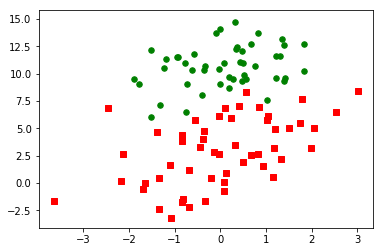

In [5]:
plotBestFit(weights)

### 5.2.4 训练算法：随机梯度上升
一次只用一个样本点来更新回归系数，该方法称为随机梯度上升法。

In [ ]:
def stocGradAscent0(dataMatrix, classLabels):
    m, n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights =weights + alpha * error * dataMatrix[i]
    return weights

In [ ]:
weights = stocGradAscent0(array(dataArr), labelMat)

In [ ]:
plotBestFit(weights)

在大的波动停止之后，还有小的周期性波动。产生这种现象的原因是存在一些不能正确分类的样本点，我们期望算法能够规避这些波动，从而收敛到某个值，另外，收敛速度也会更快。修改如下代码：

In [ ]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01    # 每次迭代，学习率需要调整
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

In [ ]:
weights = stocGradAscent1(array(dataArr), labelMat)
plotBestFit(weights)

## 5.3 从氙气病预测病马的死亡率
1. 收集数据：给定数据文件
2. 准备数据：用Python解析文本并填充缺失值
3. 分析数据：可视化并观察数据
4. 训练算法：使用优化算法，找到最佳系数
5. 测试算法：为了量化回归效果，需要观察错误率，根据错误率判断是否回退到重新训练
6. 使用算法：实现一个简单的命令行程序来收集马的病症并输出预测结果

该数据集中有30%的数据是缺失的。

### 5.3.1 准备数据：处理数据中的缺失值
面对数据缺失的时候可以采用以下方法：

- [ ] 使用可用特征的均值来填补缺失值
- [ ] 使用特殊值来填补，例如-1
- [ ] 忽略有缺失值的样本
- [ ] 使用相似的样本的均值填补缺失值
- [ ] 使用另外的机器学习算法预测缺失值

在处理数据的过程中，缺失值必须用一个实数值来替换，这里选择0替换所有缺失值，恰好能适用于Logistic 回归。
因为， 回归系数更新公式为：
$$weights = weights + alpha * error * dataMatrix[randIndex]$$
当特征值为0时，$weights = weights$ 不进行更新，对结果不造成影响。

另外， sigmoid(0) = 0.5, 它对预测的结果不具备任何倾向性，此外，该数据集中一般不具备0,所以填充的0具备“特殊性”。

预处理的第二件事，如果发现数据集里的某条数据的类别标签错误，我们就需要丢弃这条数据。

原始数据经过预处理之后保存为两个文件：horseColicTest.txt 和 horseColicTraining.txt。

### 5.3.2 逻辑回归进行分类

In [ ]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet, trainingLabels = [], []
    for line in frTrain.readlines():    # readlines 读取一整行，readline读取一个数
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 500)
    errorCount, numTestVec = 0, 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount +=1
    errorRate = float(errorCount)/numTestVec
    print "the error rate of this test is: %f" % errorRate
    return errorRate
def multiTest():
    numTests, errorSum = 10, 0
    for k in range(numTests):
        errorSum += colicTest()
    print "after %d iterations the average error rate is: %f" %(numTests, errorSum/float(numTests))

In [ ]:
multiTest()

## 5.4 本章小结
Logistic回归是找到非线性Sigmoid函数的最佳拟合参数，求解过程可以由最优化算法完成。